In [4]:
import pyspedas
import pytplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from modules.calparam import *


#swe_vars = pyspedas.wind.swe(trange=['2003-11-20','2003-11-23'],datatype='h1',varnames=['BX','BY','BZ','Proton_Np_moment','Proton_W_moment'],downloadonly=True,time_clip=True)

**Using CDFLIB**

In [26]:
import cdflib
dt = "20-23 Nov 2003"
cdf_file = cdflib.CDF(r'wget_download\wind_h1s_swe_19941122000146_19941124235824.cdf')

In [3]:
cdf_file.cdf_info()

CDFInfo(CDF=WindowsPath('C:/Users/KEVAL/Desktop/ICME-PRoject/ICME-ML/wind_h1s_swe_20100410000119_20100411235822.cdf'), Version='2.7.2', Encoding=1, Majority='Column_major', rVariables=[], zVariables=['Epoch', 'Proton_VX_moment', 'Proton_VY_moment', 'Proton_VZ_moment', 'Proton_W_moment', 'Proton_Np_moment', 'BX', 'BY', 'BZ', 'Ang_dev'], Attributes=[{'TITLE': 'Global'}, {'Project': 'Global'}, {'Discipline': 'Global'}, {'Source_name': 'Global'}, {'Descriptor': 'Global'}, {'Data_type': 'Global'}, {'File_naming_convention': 'Global'}, {'Data_version': 'Global'}, {'PI_name': 'Global'}, {'PI_affiliation': 'Global'}, {'TEXT': 'Global'}, {'Instrument_type': 'Global'}, {'Mission_group': 'Global'}, {'Logical_source': 'Global'}, {'Logical_file_id': 'Global'}, {'Logical_source_description': 'Global'}, {'Time_resolution': 'Global'}, {'Generated_by': 'Global'}, {'Generation_date': 'Global'}, {'MODS': 'Global'}, {'LINK_TEXT': 'Global'}, {'LINK_TITLE': 'Global'}, {'HTTP_LINK': 'Global'}, {'spase_Datase

In [4]:
time_range= cdflib.cdfepoch.to_datetime(cdf_file.varget('epoch'))
time_range[-1]

numpy.datetime64('2010-04-11T23:58:22.630000')

**MATPLOTLIB**

**Deriving the Parameters**

In [5]:
#plotting variables

from modules.calparam import *


BX,BY,BZ,b_mag = bmagnitude(cdf_file)


p_density = thresold(cdf_file.varget('Proton_Np_moment'),1e4)


vp = Vp_vec(cdf_file)

temp = Temperature(cdf_file)


p_beta = plasma_beta(p_density,b_mag,temp)

tehta_angle,phi_angle = angels(BX,BY,BZ,b_mag)


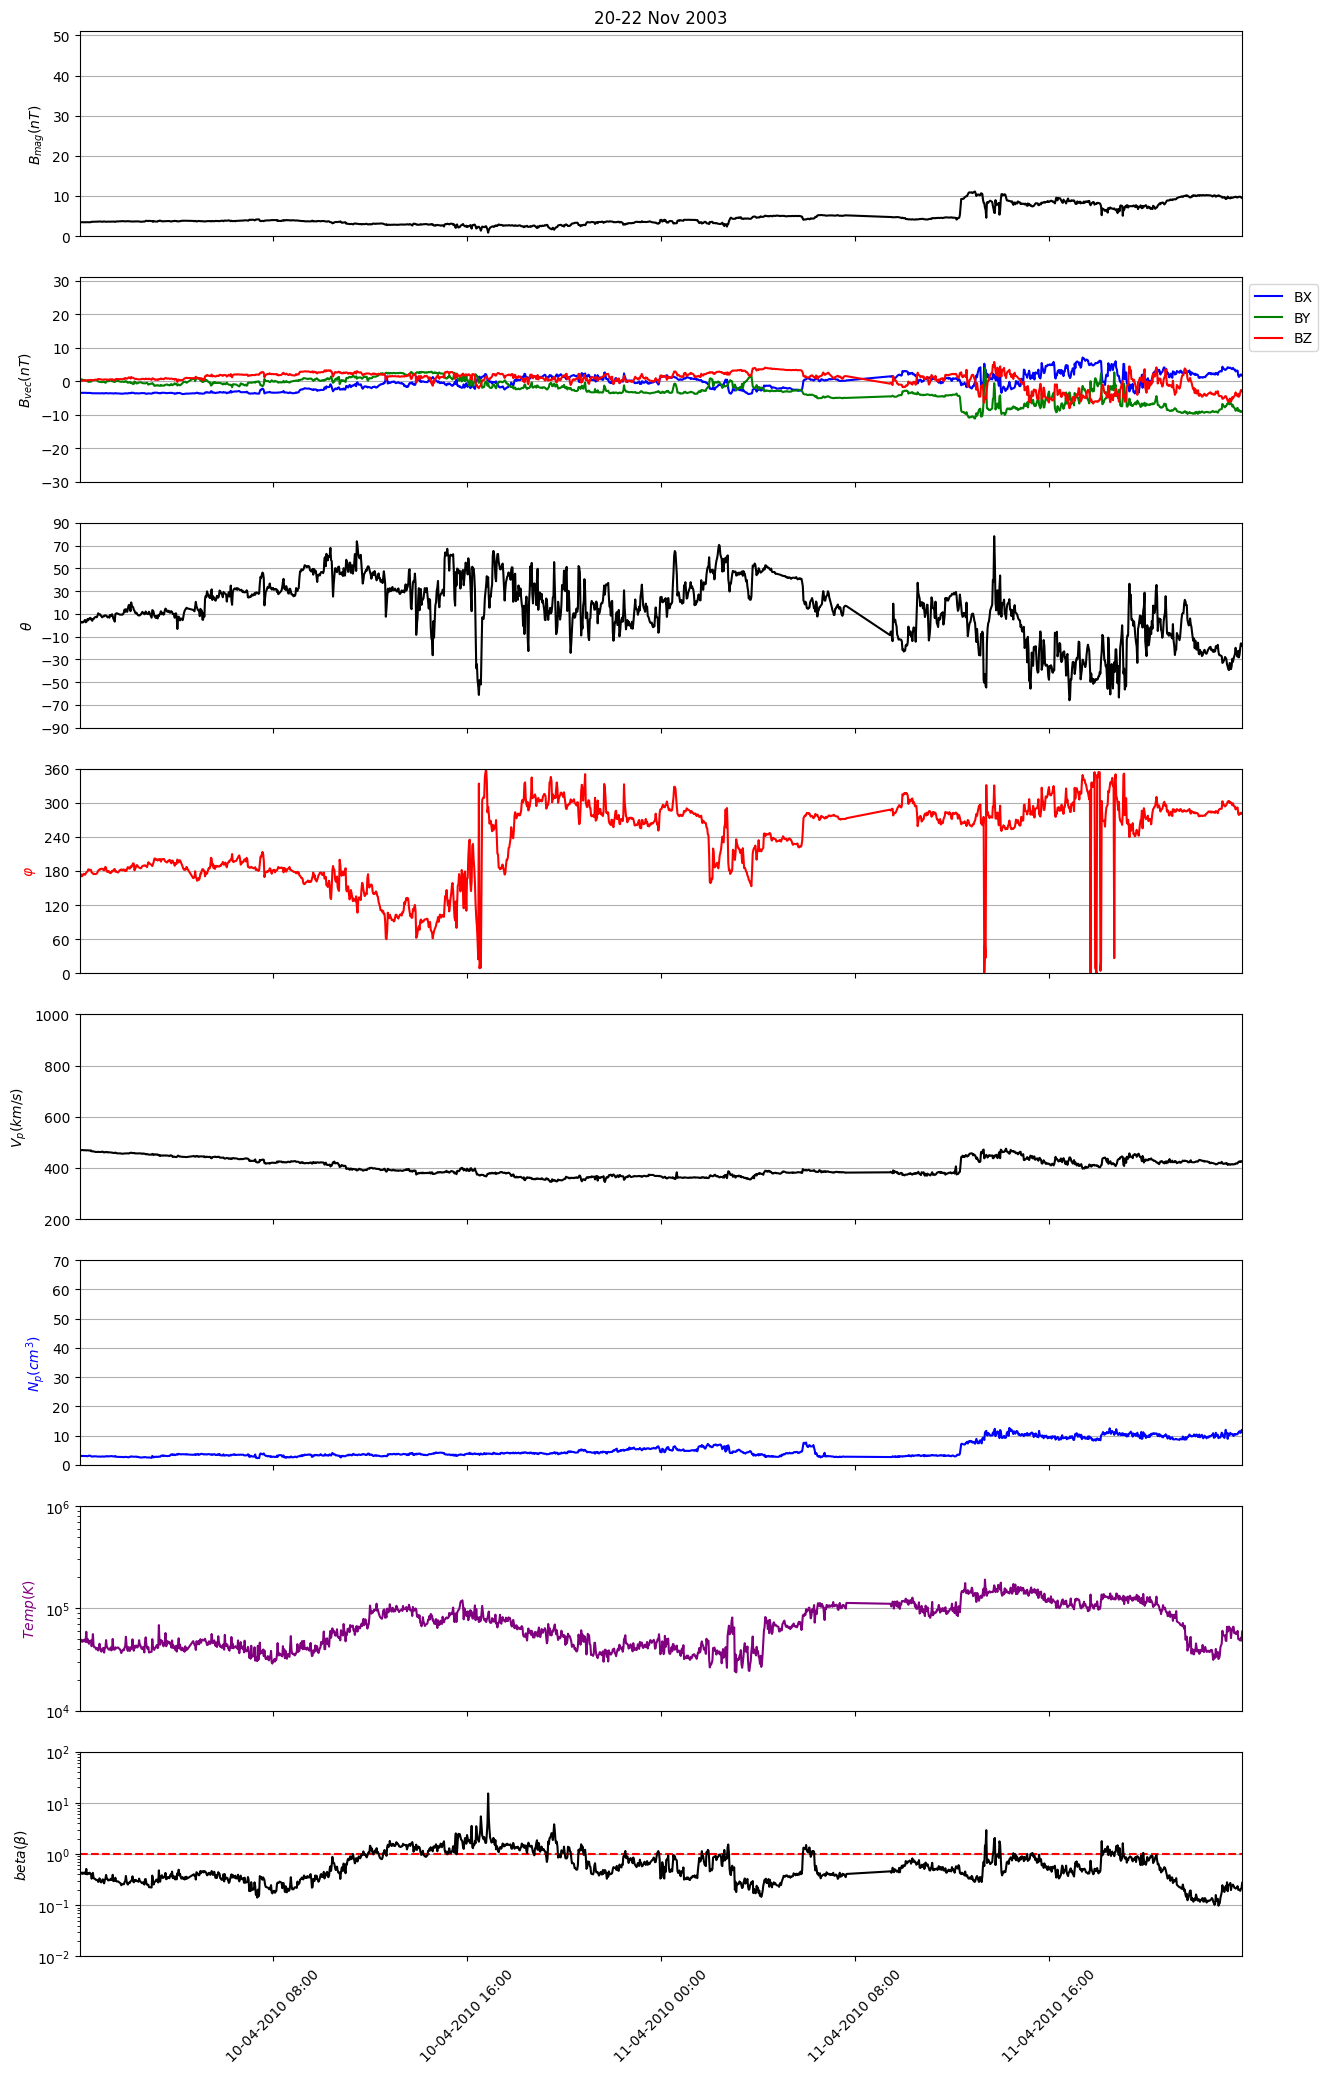

In [6]:
from modules.plotter import Plotting

plot  = Plotting(dt)

plot.ipplot(time_range,b_mag,BX,BY,BZ,tehta_angle,phi_angle,vp,p_density,temp,p_beta)


# 3days-Plotting systen

In [ ]:
from datetime import datetime, timedelta


def read_files_in_date_range(start_date, end_date):
    current_date = datetime.strptime(start_date, "%d-%m-%Y")
    end_date = datetime.strptime(end_date, "%d-%m-%Y")

    flag =False
    count =0

    while flag!=True:
        
        print(current_date)
        loop_date = current_date
 
        date_log = []
        for day in range(1,4):
            date_log.append(loop_date.strftime("%Y%m%d"))

            if end_date.strftime("%Y%m%d") in date_log:
                flag = True
                loop_date += timedelta(days=1)
                break

            loop_date += timedelta(days=1)
        
        start_trange = date_log[0]
        last_trange = loop_date.strftime("%Y%m%d")

        print(start_trange,last_trange)

        

        count+=1
        date_log =[]
        current_date += timedelta(days=1)

    return count



st  = '01-12-2003'
end = '31-12-2003'




test =  read_files_in_date_range(st, end)


In [21]:
test

29

# Request 3 days data

In [54]:

import pandas as pd

#list excel of dataset ->
import requests
from bs4 import BeautifulSoup as bs

data_list =requests.get('https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/')
data_list

years = []
for yr in bs(data_list.content).find_all('a')[4:]:
    years.append(yr.text[:-1])

    

dt = pd.DataFrame({"SWE_H1_YEARS":years})
dt.to_csv('dataset_swe_range.csv',index=False)



data_year = pd.read_csv('dataset_swe_range.csv')['SWE_H1_YEARS']


dt =[]
yr =[]
file =[]
head = True
for yrs in data_year[9:]:
    Master_data_uris =requests.get(f'https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/{yrs}')
    print("Year -------------->",yrs)
    
    for days in bs(Master_data_uris.content).find_all('a')[5:]:
        
        dat = datetime.strptime(days.text.split('_')[3], "%Y%m%d")
        format_date = dat.strftime("%d-%m-%Y")

        year = dat.strftime("%Y")

        dt.append(format_date)
        yr.append(year)
        file.append(days.text)\

    df = pd.DataFrame({"Year":yr,"Date": dt,'CDF_FILE':file})
    
    df.to_csv("Master_Dataset_SWE_H1.csv", index=False,mode='a',header=head)
    head=False 

    dt =[]
    yr =[]
    file =[]

    



 

**Real Logic**

In [6]:
import requests
from bs4 import BeautifulSoup as bs
import wget

response = requests.get('https://cdaweb.gsfc.nasa.gov/WS/cdasr/1/dataviews/sp_phys/datasets/WI_H1_SWE/data/19951231T000000Z,19960101T000000Z/Proton_VX_moment?format=cdf')

soup = bs(response.content)
# print(soup)

# if soup.find('status')!=None:
#     print(soup.find('status').text)
if soup.find('name') !=None:
    print(soup.find('name').text)
    print(soup.find('name').text.split('/')[-1])



# local_path = wget.download(f'{soup.find('name').text}', out='wget_download')

https://cdaweb.gsfc.nasa.gov/tmp/ws7ZdhMl/wind_h1s_swe_19951231000135_19951231235746.cdf
wind_h1s_swe_19951231000135_19951231235746.cdf


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import wget
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor
import time

# Global variables for controlling request delay and retries
REQUEST_DELAY = 0.2 # Adjust the delay time as needed
MAX_RETRIES = 3 # Adjust the maximum number of retries as needed


def save_cdf_data(response_content, file_name):
    with open(file_name, 'wb') as f:
        f.write(response_content)

def download_data(start_trange, last_trange):
    retries = 0
    while retries < MAX_RETRIES:
        try:
            
            url = f'https://cdaweb.gsfc.nasa.gov/WS/cdasr/1/dataviews/sp_phys/datasets/WI_H1_SWE/data/{start_trange}T000000Z,{last_trange}T000000Z/BX,BY,BZ,Proton_VX_moment,Proton_VY_moment,Proton_VZ_moment,Proton_W_moment,Proton_Np_moment?format=cdf'
            response = requests.get(url)
            if response.status_code == 200:
                soup = bs(response.content, 'html.parser')
                naming = soup.find('name')
                if naming:
                    link_text = naming.text
                    file_names = link_text.split('/')[-1]
                    result = requests.get(link_text)
                    save_cdf_data(result.content, f'down_test\\1995\\{file_names}')

                    # local_path = wget.download(naming_text, out=r'down_test\1995')
                    print(f"Downloaded {start_trange} - {last_trange} -> {file_names}")
                    break
                else:
                    print("None Datatypes")
                    break
            else:       
                print(f"Error downloading data for {start_trange} - {last_trange}: Got status code {response.status_code}")
                retries += 1
                print(f"Retrying ({retries}/{MAX_RETRIES})...")
                time.sleep(REQUEST_DELAY)
                
        except Exception as e:
            print(f"Error downloading data for {start_trange} - {last_trange}: {e}")
        
          # Introduce a delay between retries


def read_files_in_date_range(date_ranges):
    try:
        start_date = date_ranges[0]
        end_date = date_ranges[-1]
        current_date = datetime.strptime(start_date, "%d-%m-%Y")
        end_date = datetime.strptime(end_date, "%d-%m-%Y")
        flag = False

        with ThreadPoolExecutor(20) as executor:
            while not flag:
            
                loop_date = current_date
                date_log = []
                for day in range(1, 4):
                    date_log.append(loop_date.strftime("%Y%m%d"))
                    if end_date.strftime("%Y%m%d") in date_log:
                        flag = True
                        loop_date += timedelta(days=1)
                        break
                    loop_date += timedelta(days=1)
                start_trange = date_log[0]
                last_trange = loop_date.strftime("%Y%m%d")
          
                try:
                    executor.submit(download_data, start_trange, last_trange)
                except Exception as e:
                    print(f"Error downloading data for {start_trange} - {last_trange}: {e} date")

                date_log = []
                current_date += timedelta(days=1)
               
                time.sleep(REQUEST_DELAY)
                
    except Exception as e:
        print(e)

st = '01-01-1995'
end = '31-12-1995'
dates = [st, end]

read_files_in_date_range(dates)


In [1]:
import concurrent.futures

executor = concurrent.futures.ThreadPoolExecutor()
print("Default number of workers:", executor._max_workers)


Default number of workers: 20


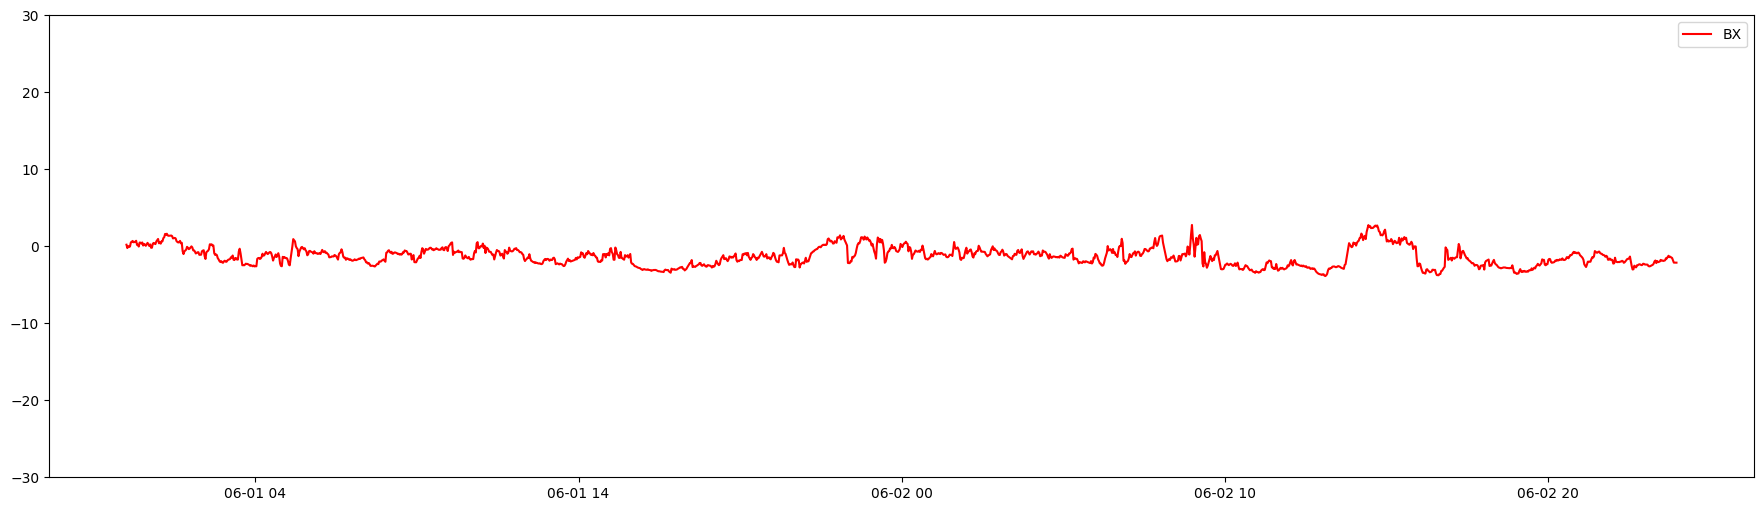

In [185]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


time_range= cdflib.cdfepoch.to_datetime(cdf_file.varget('epoch'))


plt.figure(figsize=(22,6))
plt.ylim(-30,30)
plt.plot(time_range,cdf_file["BX"],color='red',label='BX')

# Add legend
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=10))

plt.show()

# my own combine function

In [ ]:
from modules.combine_cdf import merge_cdf
import cdflib

cd1 = cdflib.CDF(r'wind_data\swe\swe_h1\2003\wi_h1_swe_20030120_v01.cdf')
cd2 = cdflib.CDF(r'wind_data\swe\swe_h1\2003\wi_h1_swe_20030121_v01.cdf')
cd3 = cdflib.CDF(r'wind_data\swe\swe_h1\2003\wi_h1_swe_20030122_v01.cdf')

days_3 = merge_cdf(cd1,cd2,cd3)



**3days calculations**

In [ ]:
days_3.keys()

In [ ]:
#plotting variables

from modules.calparam import *

BX,BY,BZ,b_mag = bmagnitude(days_3)


p_density = days_3['Proton_Np_moment']
if len(p_density[p_density >= 10000]) >= 1:
    p_density[p_density >= 10000] = np.nan
    p_density = pd.Series(p_density).interpolate().values

vp = Vp_vec(days_3)

temp = Temperature(days_3)


p_beta = plasma_beta(p_density,b_mag,temp)

tehta_angle,phi_angle = angels(BX,BY,BZ,b_mag)


In [ ]:
from modules.plotter import Plotting
import matplotlib.pyplot as plt
# plt.ioff()
plot  = Plotting()

t = plot.ipplot(days_3['t_range'],b_mag,BX,BY,BZ,tehta_angle,phi_angle,vp,p_density,temp,p_beta)

t.savefig('myimage2.jpg', format='jpg', dpi=300)